# MOVIE RECOMMENDATION 2022
© Explore Data Science Academy

<br></br>

<div align="center" style="width: 700px; font-size: 80%; text-align: center; margin-left: 100px">
<img src="resources/imgs/Image_header.png"
     alt="Collaborative-based Filtering - Utility Matrix"
     style="float: center; padding-bottom=0.5em"
     width=700px/>
</div>

#### Development Team

1. Mercy Milkah Gathoni
2. Linda Kelida
3. Samuel Mijan
4. Sipho Lukhele
5. Jessica Njuguna

<a id="one"></a>
## 1. INTRODUCTION

## Overview


On the internet, where the number of choices is overwhelming, there is a need to filter, prioritize and efficiently deliver relevant information in order to reduce the problem of information overload, which has created a potential problem to many Internet users. Recommender systems solve this problem by searching through large volume of dynamically generated information to provide users with personalized content and services. 

Recommender systems are information filtering systems that deal with the problem of information overload by filtering vital information fragment out of large amount of dynamically generated information according to user’s preferences, interest, or observed behaviour about item. Recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile.

Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to improve decision making process and quality.

### Problem Statement

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

<a id="cont"></a>
### Table of Contents

**<a href=#one>1. Introduction</a>**
- Problem Statement
- Table of Contents
- Summary
- Preliminary Activities


**<a href=#two>2. Exploratory Data Analysis</a>**


**<a href=#three>3. Feature Engineering</a>**
- Dealing with Null Values
- Data Scaling
- Dimension Reduction


**<a href=#four>4. Modelling</a>**
- Logging Comet Experiments


**<a href=#five>5. Model Perfomance Comparison</a>**


**<a href=#six>6. Model Explanations</a>**


**<a href=#seven>7. Conclusion</a>**


**<a href=#eight>8. Appendix</a>**
- Kaggle Submissions

### Summary

**Agenda:**

**Deliverables:**

**Results:**

### Preliminary Activities

#### Comet set up

Comet ML is an experimentation platform, which permits testing Machine Learning projects, from the beginning up to the final monitoring.

Doing ML with Comet is like building with legos. You can customize and combine your data, code, visualizations, reports, and much more to create exactly what you want.

So we start by integrating our notebook with Comet.ml so that we can see everything we will do with our data.

In [1]:
from comet_ml import Experiment

In [2]:
experiment = Experiment(api_key="MHehhbanm9HbbvXptMjQ0hinn",
    project_name="movie-recommender-2022",
    workspace="jessica-njuguna")

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jessica-njuguna/movie-recommender-2022/00e112215d9a4e4da917ed9d6b6ccb7f



#### Importing Packages

In [3]:
!!pip install wordcloud

['Requirement already satisfied: wordcloud in /home/explore-student/anaconda3/lib/python3.7/site-packages (1.8.1)',
 'Requirement already satisfied: numpy>=1.6.1 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from wordcloud) (1.18.1)',
 'Requirement already satisfied: pillow in /home/explore-student/anaconda3/lib/python3.7/site-packages (from wordcloud) (7.0.0)',
 'Requirement already satisfied: matplotlib in /home/explore-student/anaconda3/lib/python3.7/site-packages (from wordcloud) (3.1.3)',
 'Requirement already satisfied: python-dateutil>=2.1 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from matplotlib->wordcloud) (2.8.1)',
 'Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from matplotlib->wordcloud) (2.4.6)',
 'Requirement already satisfied: cycler>=0.10 in /home/explore-student/anaconda3/lib/python3.7/site-packages (from matplotlib->wordcloud) (0.10.0)',
 '

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer
#from yellowbrick.cluster import KElbowVisualizer

from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise import SVD, SVDpp, SlopeOne, NMF, NormalPredictor
from surprise import KNNBaseline, KNNBasic, KNNWithMeans, KNNWithZScore
from surprise import BaselineOnly, CoClustering
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy

import numpy as np 
import pandas as pd

import scipy as sp 
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
#import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate

import operator 
import heapq 
#import xgboost as xgb
from surprise import Reader, Dataset
from surprise import BaselineOnly
from surprise import KNNBaseline
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp
from surprise.model_selection import GridSearchCV

#other libraries
from IPython.core.display import HTML
from IPython.display import YouTubeVideo
from collections import defaultdict
import re
from IPython.display import display_html

import warnings
warnings.filterwarnings('ignore')

#### Importing Data

*****Brief explanation about the data*****

In [5]:
raw_train_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/train.csv')
raw_test_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/test.csv')
raw_movies_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/movies.csv')
raw_tags_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/tags.csv')
raw_links_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/links.csv')
raw_imdb_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/imdb_data.csv')
raw_getags_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/genome-tags.csv')
raw_gescores_df = pd.read_csv('/home/explore-student/unsupervised_data/unsupervised_movie_data/genome-scores.csv')

###### Before we Start on Exploratory Data Analysis

###### We need to have a high view on all  our data frames 

We will create functions to perform basic EDA on all the datasets

###### Head() prints the first 5 rows of our dataset including column header and the content of each row.

In [6]:
#function that displays the first five raws of a data frame
def display_df(df):
    '''This functions takes in a dataframe and returns the first five raws of it'''
    return df.head()

Call the function to any data frame that we have ... Here we will call the function on the train set and have a look at the columns and the values in it

###### Describe() gives the mean, median, standard deviation and percentiles of all the numerical values in our dataset. 

So we create a function that takes in a dataframe and returns the summary statistics

In [7]:
#define a data frame summary statistic function
def summary_stat(df):
    '''This function takes a dataframe and returns the summary statistics of all numerical columns'''
    return df.describe()

In [8]:
# The following function will check the data types, count the number of observations and the total sum of the misssing values in each data set
def basic_eda(df):
    print('The columns data types are as follows: \n')
    print(df.info(), '\n')
    print('The dataframe has datapoints totalling to: \n')
    print(df.shape[0], '\n')
    print('Checking the number of missing values in the columns \n')
    print(df.isna().sum())
    return

<a id="two"></a>
## 2. EXPLORATORY DATA ANALYSIS
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

What is EDA?

EDA is Exploratory is a robust technique for familiarising yourself with the Data and extracting useful insights.

EDA is important because besides getting the basic insights and general understanding of our data, we can set the procedure and steps to follow on the entire modelling course.

The datasets took a long time to load, this suggests that the files may be large. Let us view the size of each dataset using the function below:

In [9]:
def view_memory_usage(df, verbose = True):
    mem = df.memory_usage().sum() / 1024 ** 2
    print("Memory usage is {:.2f} Mb \n".format(mem))
    return

In [10]:
print('Train df:')
view_memory_usage(raw_train_df, verbose = True)
print('Test df:')
view_memory_usage(raw_test_df , verbose = True)
print('Movies df:')
view_memory_usage(raw_movies_df, verbose = True)
print('Tags df:')
view_memory_usage(raw_tags_df, verbose = True)
print('Links df:')
view_memory_usage(raw_links_df, verbose = True)
print('IMDB df:')
view_memory_usage(raw_imdb_df, verbose = True)
print('Genome_tags df:')
view_memory_usage(raw_getags_df, verbose = True)
print('Genome_scores df:')
view_memory_usage(raw_gescores_df, verbose = True)

Train df:
Memory usage is 305.18 Mb 

Test df:
Memory usage is 76.29 Mb 

Movies df:
Memory usage is 1.43 Mb 

Tags df:
Memory usage is 33.37 Mb 

Links df:
Memory usage is 1.43 Mb 

IMDB df:
Memory usage is 1.25 Mb 

Genome_tags df:
Memory usage is 0.02 Mb 

Genome_scores df:
Memory usage is 356.70 Mb 



The total memory for all the files uploaded totals to 776 MBs with our largest files being the train df and genome scores df. This will slow down the overall processing of the data. One way to tackle this is to reduce the file size.

#### Reducing file size

As mentioned above, our data is large hence we need to reduce the file size. One way to do this is by changing the data type. We will do this using the function below.

In [11]:
#A00
def reduce_memory_usage(df1, verbose=True):
    df = df1.copy(deep = True)
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        print(
            "Mem. usage decreased to {:.2f} Mb ({:.1f}% reduction)".format(
                end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

Now that the function has been successfully initialized we can apply it to the dataset

In [12]:
#A00
train_df = reduce_memory_usage(raw_train_df, verbose=True)
test_df= reduce_memory_usage(raw_test_df, verbose=True)
movies_df= reduce_memory_usage(raw_movies_df, verbose=True)
tags_df= reduce_memory_usage(raw_tags_df, verbose=True)
links_df= reduce_memory_usage(raw_links_df, verbose=True)
imdb_df= reduce_memory_usage(raw_imdb_df, verbose=True)
getags_df= reduce_memory_usage(raw_getags_df, verbose=True)
gescores_df= reduce_memory_usage(raw_gescores_df, verbose=True)

Mem. usage decreased to 152.59 Mb (50.0% reduction)
Mem. usage decreased to 38.15 Mb (50.0% reduction)
Mem. usage decreased to 1.19 Mb (16.7% reduction)
Mem. usage decreased to 20.85 Mb (37.5% reduction)
Mem. usage decreased to 0.71 Mb (50.0% reduction)
Mem. usage decreased to 1.04 Mb (16.7% reduction)
Mem. usage decreased to 0.01 Mb (37.2% reduction)
Mem. usage decreased to 148.62 Mb (58.3% reduction)


Success! Our memory has been reduced from a total of 776 MBs to 363 MBs, a 53% reduction. We can now proceed to conduct the EDA of each dataset.

### Train Df

In [13]:
display_df(train_df)


,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [14]:
basic_eda(train_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int32  
 1   movieId    int32  
 2   rating     float32
 3   timestamp  int32  
dtypes: float32(1), int32(3)
memory usage: 152.6 MB
None 

The dataframe has datapoints totalling to: 

10000038 

Checking the number of missing values in the columns 

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


###### There are no null values in the train data set

In [15]:
# We check the Train data set's Statistics
summary_stat(train_df)

,userId,movieId,rating,timestamp
count,1.000004e+07,1.000004e+07,1.000004e+07,1.000004e+07
mean,8.119909e+04,2.138911e+04,3.540094e+00,1.215677e+09
std,4.679359e+04,3.919578e+04,1.036790e+00,2.268921e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.197000e+03,3.000000e+00,1.011742e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.199019e+09
75%,1.215790e+05,8.630000e+03,4.000000e+00,1.447242e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [16]:
# We analysing the train set
print("Total Train Data:")
print("Total number of movie ratings in Train data = "+str(train_df.shape[0]))
print("Number of unique users in Train data = "+str(len(np.unique(train_df["userId"]))))
print("Number of unique movies in Train data = "+str(len(np.unique(train_df["movieId"]))))
print("Highest value of a User ID = "+str(max(train_df["userId"].values)))
print("Highest value of a Movie ID = "+str(max(train_df["movieId"].values)))

Total Train Data:
Total number of movie ratings in Train data = 10000038
Number of unique users in Train data = 162541
Number of unique movies in Train data = 48213
Highest value of a User ID = 162541
Highest value of a Movie ID = 209171


Our trainset consists of 10 000 038 movie ratings, 162 541 unique users and a total of 48 213 movies.

## Ratings

Ratings have been the most popular source of knowledge for recommender system to present users preferences from the early 1990s to more recent years.

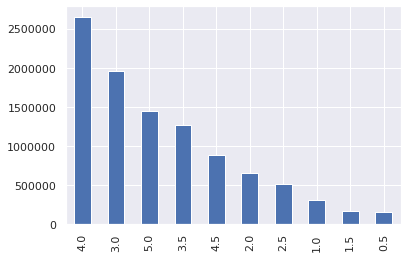

In [17]:
# The graph showing how many movies had specific ratings
train_df['rating'].value_counts().plot(kind = 'bar')

The highest rating is 4, with over 2.5 million movies being rated 4

### User Ratings

In [18]:
# No of ratings per users
no_of_rated_movies_per_user = train_df.groupby(by = "userId")["rating"].count().sort_values(ascending = False)

no_of_rated_movies_per_user.head()

userId
72315     12952
80974      3680
137293     3588
33844      3208
20055      3050
Name: rating, dtype: int64

The user who have rated most movies with 12952 ratings is user no 72315

In [26]:
# Changing the Timestamp column to Datetime data type
train_df['timestamp'] = train_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

In [27]:
# Display the dataframe to see how it has turned out
display_df(train_df)

,userId,movieId,rating,timestamp
0,5163,57669,4.0,2018-02-11 11:53:12
1,106343,5,4.5,2008-03-23 02:18:59
2,146790,5459,5.0,2004-02-08 04:45:39
3,106362,32296,2.0,2015-02-04 09:36:05
4,9041,366,3.0,1996-05-29 13:17:17


In [28]:
# Here we split the Timestamp column into year, month, day of week and hour, so as to help analyse the data better
train_df['rating_year'] = pd.to_datetime(train_df['timestamp']).dt.year
train_df['month'] = pd.DatetimeIndex(train_df['timestamp']).month
train_df['day_of_week'] = pd.DatetimeIndex(train_df['timestamp']).dayofweek
train_df['hour_of_day'] = pd.DatetimeIndex(train_df['timestamp']).hour

In [29]:
# We have a look at how the dataframe looks like
display_df(train_df)

,userId,movieId,rating,timestamp,rating_year,month,day_of_week,hour_of_day
0,5163,57669,4.0,2018-02-11 11:53:12,2018,2,6,11
1,106343,5,4.5,2008-03-23 02:18:59,2008,3,6,2
2,146790,5459,5.0,2004-02-08 04:45:39,2004,2,6,4
3,106362,32296,2.0,2015-02-04 09:36:05,2015,2,2,9
4,9041,366,3.0,1996-05-29 13:17:17,1996,5,2,13


In [30]:
# Change the numbers on the day_of_week column to actual names of days so that we can derive insights better from the data set
days = { 0: 'Mon', 1: 'Tue', 2: 'Wed', 3:'Thurs', 4:'Fri', 5: 'Sat', 6: 'Sun'}

train_df['day_of_week'] = train_df['day_of_week'].apply(lambda x: days[x])
display_df(train_df)

,userId,movieId,rating,timestamp,rating_year,month,day_of_week,hour_of_day
0,5163,57669,4.0,2018-02-11 11:53:12,2018,2,Sun,11
1,106343,5,4.5,2008-03-23 02:18:59,2008,3,Sun,2
2,146790,5459,5.0,2004-02-08 04:45:39,2004,2,Sun,4
3,106362,32296,2.0,2015-02-04 09:36:05,2015,2,Wed,9
4,9041,366,3.0,1996-05-29 13:17:17,1996,5,Wed,13


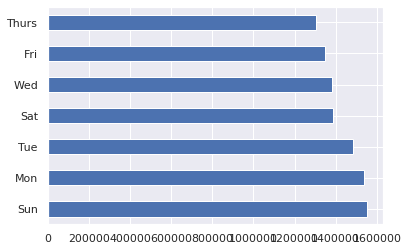

In [31]:
# Check which day of the week are most movies watched, from the graph below we see it's Sunday with a small lead over Mondays
train_df['day_of_week'].value_counts().plot(kind='barh')

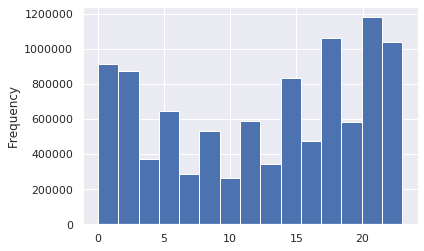

In [32]:
# Check which hours of the day are most movies watched, from the graph below we see it's the hours between 9pm and 5am
train_df['hour_of_day'].plot(kind='hist', bins = 15)

### IMDB, Movies and Tags Data Sets

Lets display the Datasets

In [33]:
display_df(movies_df)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
display_df(imdb_df)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [35]:
display_df(tags_df)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


Let's also have look at some of their basic info

In [36]:
basic_eda(tags_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int32 
 1   movieId    1093360 non-null  int32 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int32 
dtypes: int32(3), object(1)
memory usage: 20.9+ MB
None 

The dataframe has datapoints totalling to: 

1093360 

Checking the number of missing values in the columns 

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


###### There are 16 null values in the tag column

In [37]:
basic_eda(imdb_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int32  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float32
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float32(1), int32(1), object(4)
memory usage: 1.0+ MB
None 

The dataframe has datapoints totalling to: 

27278 

Checking the number of missing values in the columns 

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64


###### Here we have Title_cast, Director, runtime, budget, and Plot_keywords columns having many null values. It's an issue that will affect how well we analyse the data sets and the insights we mine. We have to deal with the issue later.

Having looked at the three sets, we will merge them together on the movieId so as to perform better visualization analysis

In [38]:
#merge imdb set to movies set on their id 
movies_df = raw_movies_df.merge(raw_imdb_df, how = 'left', on = 'movieId')


In [39]:
movies_df = movies_df.merge(raw_tags_df, how = 'left', on = 'movieId')
display_df(movies_df)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361.0,Pixar,1.216146e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,Pixar,1.223305e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,time travel,1.223305e+09


## Splitting the genres and title_casts into lists

In [40]:
# We create a new column 'Release year' and extract that information from the 'Title' column, and afterwards display the dataframe
movies_df['release_year'] = movies_df["title"].str.extract(r"\((\d{4})\)$", expand=False)
movies_df["release_year"] = pd.to_numeric(movies_df["release_year"])
movies_df["title"] = movies_df.title.str.replace(r"\((\d{4})\)$", "")
movies_df.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09,1995.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09,1995.0


In [41]:
#splitting the title_cast column into a list

movies_df['title_cast']=movies_df['title_cast'].str.split('|') 
movies_df.head()

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp,release_year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09,1995.0
1,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09,1995.0
2,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361.0,Pixar,1.216146e+09,1995.0
3,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,Pixar,1.223305e+09,1995.0
4,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,time travel,1.223305e+09,1995.0


In [42]:
#spliting the genres column into a list
movies_df['genres']=movies_df['genres'].str.split('|')
movies_df

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp,release_year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09,1995.0
1,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09,1995.0
2,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361.0,Pixar,1.216146e+09,1995.0
3,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,Pixar,1.223305e+09,1995.0
4,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,time travel,1.223305e+09,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1110527,209157,We,[Drama],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1110528,209159,Window of the Soul,[Documentary],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0
1110529,209163,Bad Poems,"[Comedy, Drama]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.0
1110530,209169,A Girl Thing,[(no genres listed)],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001.0


In [43]:
# We check the Summary statistics of the new movies_df
summary_stat(movies_df)

,movieId,runtime,userId,timestamp,release_year
count,1.110532e+06,663981.000000,1.093360e+06,1.093360e+06,1.106914e+06
mean,6.012344e+04,115.432430,6.759022e+04,1.430115e+09,1.997511e+03
std,6.085502e+04,25.505062,5.152114e+04,1.177384e+08,1.900735e+01
min,1.000000e+00,1.000000,3.000000e+00,1.135429e+09,1.874000e+03
25%,3.578000e+03,99.000000,1.520400e+04,1.339262e+09,1.991000e+03
50%,4.804300e+04,112.000000,6.219900e+04,1.468929e+09,2.003000e+03
75%,1.048810e+05,128.000000,1.136420e+05,1.527402e+09,2.011000e+03
max,2.091710e+05,877.000000,1.625340e+05,1.574317e+09,2.019000e+03


The average runtime for movies is about 115 minutes and from this also we are able to see that the maximum runtime as 877 minutes(such a long time watching a movie).

## Runtime
A closer look at the Runtime.

From its humble beginnings of 1 minute silent, black & white clips to epic 3 hour visual delights, movies have a come a long way in terms of runtime. In this section, let us try and gain some additional insights about the nature of movie lengths and their evolution over time

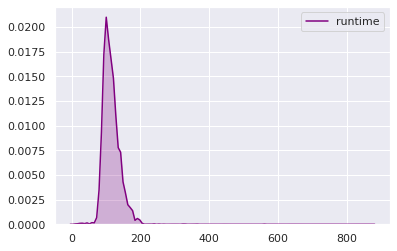

In [44]:
#Plot the Runtime
sns.set(style="darkgrid", )
sns.kdeplot(data=movies_df['runtime'], shade=True, color='purple')

In [45]:
# Show movies with short lengths
movies_df[movies_df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime').head(10)

,runtime,title,release_year
919787,1.0,Santa Claus,1898.0
895254,1.0,The Kiss,1900.0
895255,1.0,The Kiss,1900.0
895256,1.0,The Kiss,1900.0
895257,1.0,The Kiss,1900.0
895258,1.0,The Kiss,1900.0
895259,1.0,The Kiss,1900.0
919786,1.0,Santa Claus,1898.0
919903,1.0,Stille Nacht I: Dramolet,1988.0
919785,1.0,Santa Claus,1898.0


There are a couple 1 minute long movies as you can see above

In [46]:
#Show movies with long lengths 
movies_df[movies_df['runtime'] > 0][['runtime', 'title', 'release_year']].sort_values('runtime', ascending=False).head(10)

,runtime,title,release_year
915955,877.0,Taken,2002.0
781245,750.0,Law of the Lawless (Brigada),2002.0
781247,750.0,Law of the Lawless (Brigada),2002.0
781246,750.0,Law of the Lawless (Brigada),2002.0
781244,750.0,Law of the Lawless (Brigada),2002.0
798291,644.0,Sam Peckinpah: Man of Iron,1993.0
798292,644.0,Sam Peckinpah: Man of Iron,1993.0
798293,644.0,Sam Peckinpah: Man of Iron,1993.0
815941,629.0,Death on the Staircase (Soupçons),2004.0
815935,629.0,Death on the Staircase (Soupçons),2004.0


The Longest movie is Taken and was released in 2002

In [50]:
basic_eda(movies_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110532 entries, 0 to 1110531
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   movieId        1110532 non-null  int64  
 1   title          1110532 non-null  object 
 2   genres         1110532 non-null  object 
 3   title_cast     677587 non-null   object 
 4   director       678498 non-null   object 
 5   runtime        663981 non-null   float64
 6   budget         584923 non-null   object 
 7   plot_keywords  675004 non-null   object 
 8   userId         1093360 non-null  float64
 9   tag            1093344 non-null  object 
 10  timestamp      1093360 non-null  float64
 11  release_year   1106914 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.1+ MB
None 

The dataframe has datapoints totalling to: 

1110532 

Checking the number of missing values in the columns 

movieId              

In [51]:
# Running this function reveals the data type on each column and the number of null values in each column which is quite substantial

basic_eda(movies_df)

The columns data types are as follows: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110532 entries, 0 to 1110531
Data columns (total 12 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   movieId        1110532 non-null  int64  
 1   title          1110532 non-null  object 
 2   genres         1110532 non-null  object 
 3   title_cast     677587 non-null   object 
 4   director       678498 non-null   object 
 5   runtime        663981 non-null   float64
 6   budget         584923 non-null   object 
 7   plot_keywords  675004 non-null   object 
 8   userId         1093360 non-null  float64
 9   tag            1093344 non-null  object 
 10  timestamp      1093360 non-null  float64
 11  release_year   1106914 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 110.1+ MB
None 

The dataframe has datapoints totalling to: 

1110532 

Checking the number of missing values in the columns 

movieId              

Only three of the columns have no missing values, the rest have quite a large amount of missing values and we will visualizejust how much values we miss on this merged data set

## Concatinating the dataset

In [52]:
con = pd.concat([train_df[:1000],movies_df], axis=1)
con.head()

,userId,movieId,rating,timestamp,rating_year,month,day_of_week,hour_of_day,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp,release_year
0,5163.0,57669.0,4.0,2018-02-11 11:53:12,2018.0,2.0,Sun,11.0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09,1995.0
1,106343.0,5.0,4.5,2008-03-23 02:18:59,2008.0,3.0,Sun,2.0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09,1995.0
2,146790.0,5459.0,5.0,2004-02-08 04:45:39,2004.0,2.0,Sun,4.0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361.0,Pixar,1.216146e+09,1995.0
3,106362.0,32296.0,2.0,2015-02-04 09:36:05,2015.0,2.0,Wed,9.0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,Pixar,1.223305e+09,1995.0
4,9041.0,366.0,3.0,1996-05-29 13:17:17,1996.0,5.0,Wed,13.0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164.0,time travel,1.223305e+09,1995.0


## Heatmap

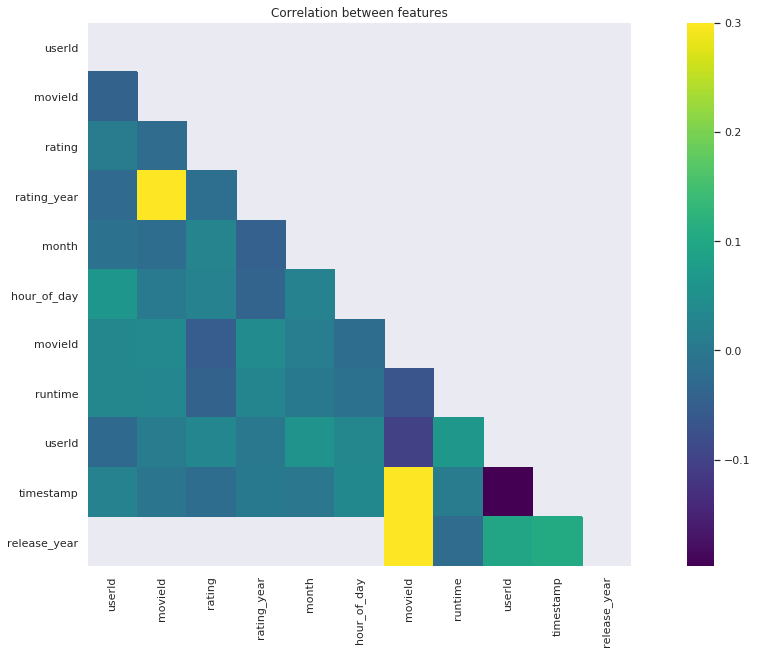

In [53]:
correlation = con.corr()

# create a mask and only show half of the cells 
mask = np.zeros_like(correlation)
mask[np.triu_indices_from(mask)] = True


fig = plt.figure(figsize = (20, 10))

# plot the data using seaborn
ax = sns.heatmap(correlation, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 cmap = "viridis",
                 color = "teal")

ax.set_title("Correlation between features");

There is a clear correlation between the movieId and Timestamp because movie lengths are not the same.

And there is correlation between rating_year and MovieId

## Genres

A **Wordcloud** (or Tag cloud) is a visual representation of text data. It displays a list of words, the importance of each beeing shown with font size or color. This format is useful for quickly perceiving the most prominent terms.

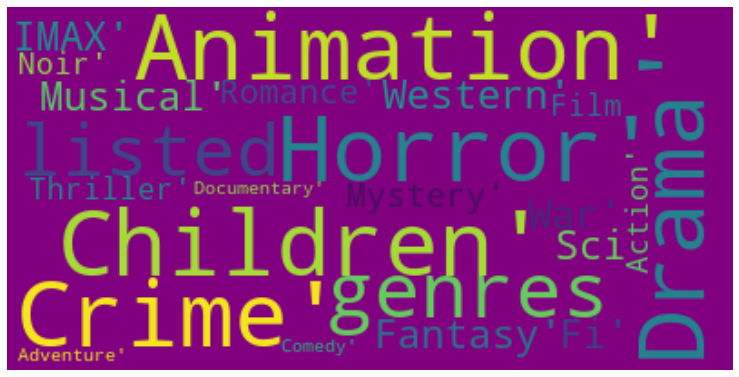

In [54]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
gen = con['genres'].explode()
text = list(set(gen))
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="purple").generate(str(text))

plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

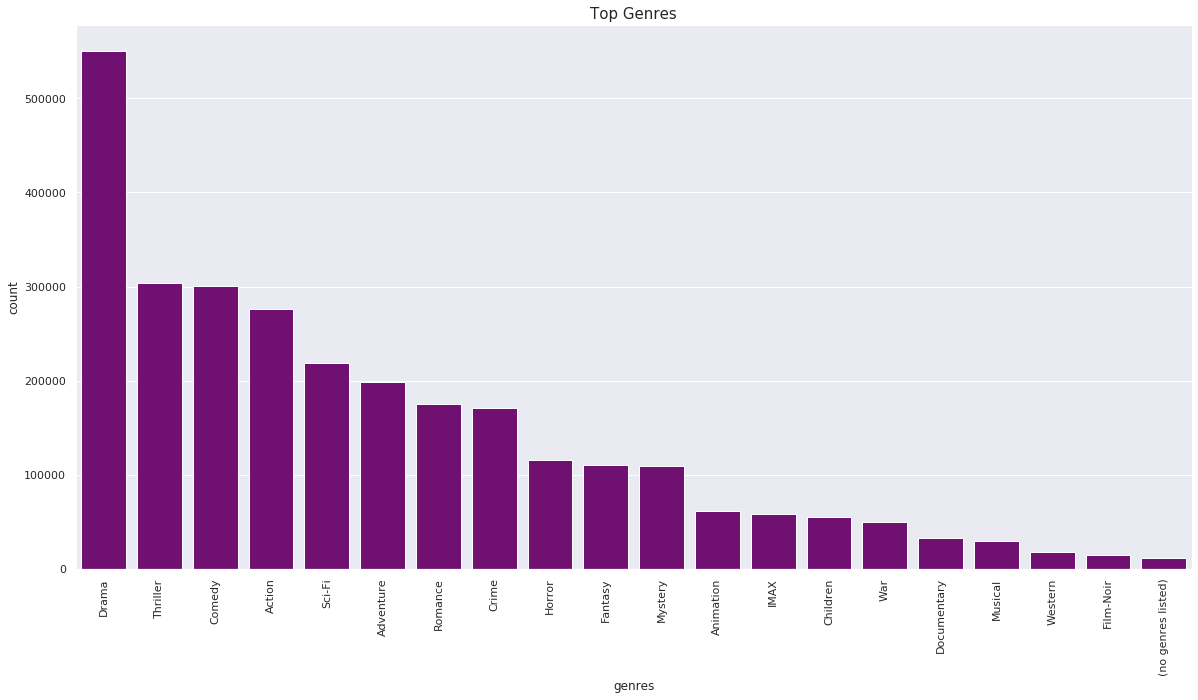

In [55]:
# Ploting top genres in the Dataset
plt.figure(figsize=(20, 10))
gen = con['genres'].explode()
ax=sns.countplot(x=gen, order=gen.value_counts().index[:30],color='purple')
ax.set_title('Top Genres', fontsize=15)
plt.xticks(rotation =90)
plt.show()

Drama is the most commonly occuring genre with almost half of the movies identifying itself as a drama film. Comedy comes in at a distant second with 25% of the movies having adequate doses of humor. Other major genres in the top 10 are Thriller, Romance,Action, Horror, Documentary and Crime.

######  Top Directors 
To know the most popular director, we can visualize it.

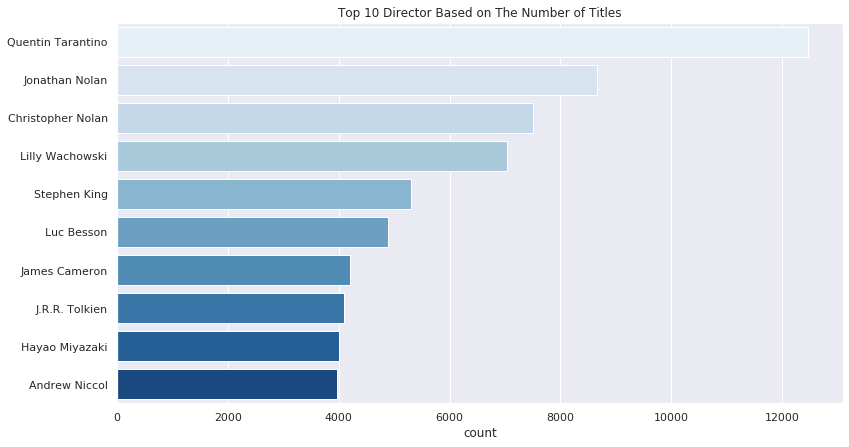

In [56]:

movies_df.director.fillna("No Director", inplace=True)
movies_df.title_cast.fillna("No Cast", inplace=True)

filtered_directors = movies_df[(movies_df.director != 'No Director') & (movies_df.director != 'See full summary')].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')

plt.show()

The most popular director on Netflix, with the most titles, is mainly Quentin Tarantino

##  Casts
Let us now take a look at the cast of our movies.

In [57]:
imdb_df['title_cast'] = imdb_df.title_cast.astype(str)
imdb_df['title_cast'] = imdb_df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
imdb_df['title_cast'] = imdb_df['title_cast'].map(lambda x: x.split('|')[:5])
imdb_df['title_cast'] = imdb_df['title_cast'].apply(lambda x: " ".join(x for x in x))
imdb_df.head(2)

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,tomhanks timallen donrickles jimvarney wallace...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,robinwilliams jonathanhyde kirstendunst bradle...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game


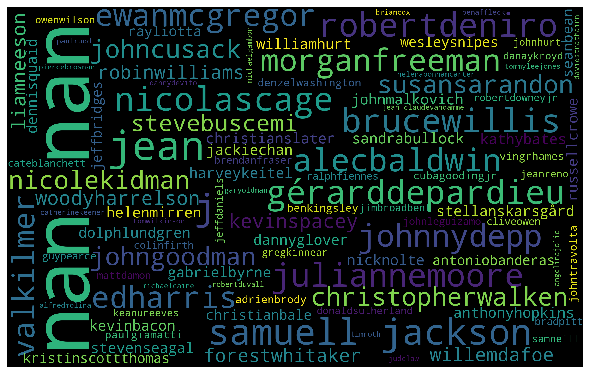

In [58]:
comment_words = ''
stopwords = set(STOPWORDS)
 
#iterate through the csv file
for val in imdb_df.title_cast:
     
    #typecaste each val to string
    #val = str(val)
 
    #split the value
    tokens = val.split()
     
    #converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 500,
                background_color ='black',
                stopwords = stopwords,
                max_words =2000,
                max_font_size = 110,
                scale=3,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### Observation
According to our WordCloud, a lorge portion of movies have 'no cast' where a title cast should be. However, we seesome popular names such as Morgan Freeman, Samuel Jackson, Bruce Willis, Johnny Depp, Robert deNiro, and John Cusack. These are some of the biggest names in Hollywood, starring in blockbuster flicks regularly.

## Movies per year

The dataset has 48213 movies avalable to us. it is reasonable to assume that it does include almost every major film released during those years with this assumptions in mind, let us take a look at the number of movies produced by the year.

Text(0.5, 1.0, 'TOTAL MOVIES RELEASED PER YEAR')

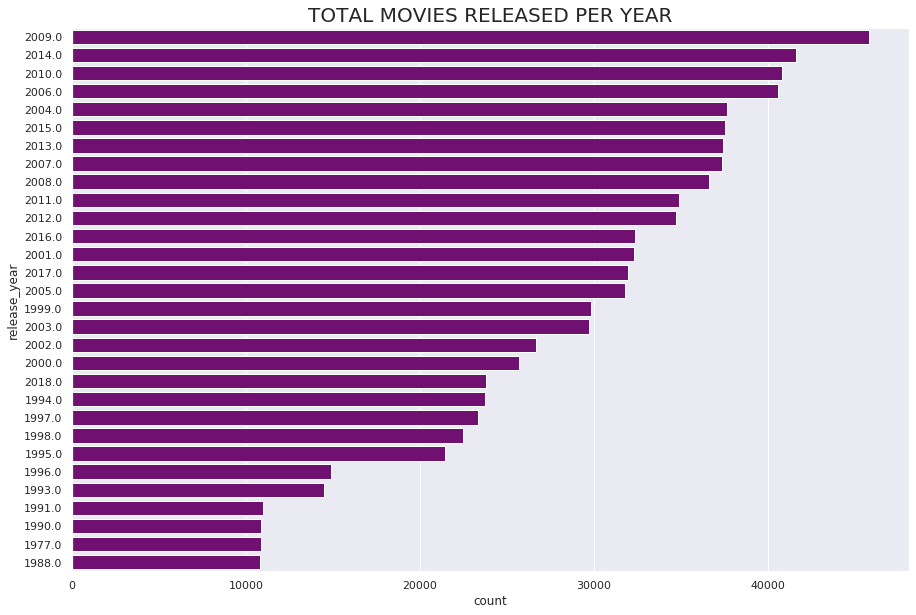

In [59]:
# Plot movies released per year
plt.figure(figsize=(15,10))
sns.set(style="darkgrid")
ax = sns.countplot(y=movies_df['release_year'], data=con, order=con['release_year'].value_counts().index[0:30],color='purple')
ax.set_title('TOTAL MOVIES RELEASED PER YEAR', fontsize= 20)

2015 has the most released movies with over 2500 movies, least movies were released in 1993 with less than 700 movies released.

## Tags
These tags allows users to attach free plot keywords.

In [60]:
tagg = tags_df['tag']
tagg.dropna(inplace=True)

<function matplotlib.pyplot.show(*args, **kw)>

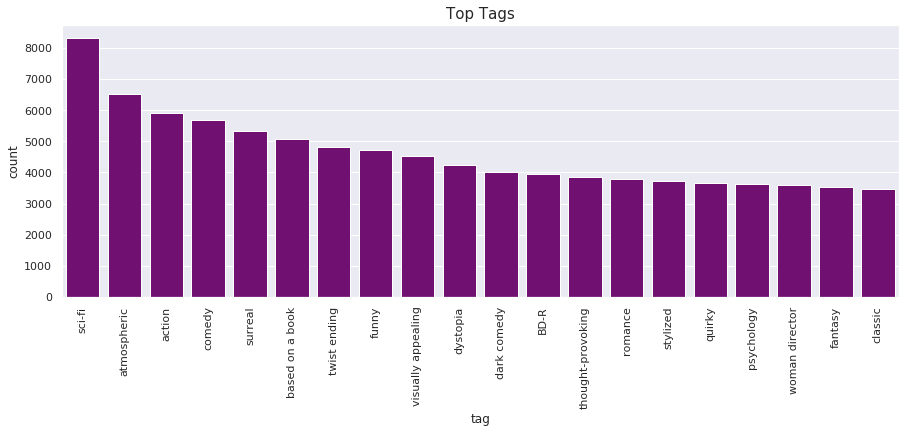

In [61]:
#Plot tags 
plt.figure(figsize=(15, 5))
ax = sns.countplot(x=tagg, order = tagg.value_counts().index[:20],color = 'purple')
ax.set_title('Top Tags', fontsize=15)
plt.xticks(rotation=90)
plt.show

Sci-fi is the most popular tag while classic has the least number of counts.

<a id="three"></a>
## 3. FEATURE ENGINEERING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. In order to make machine learning work well on new tasks, it might be necessary to design and train better features. The presence of irrelevant characteristics in your Data can reduce the Model accuracy and cause your Model to train based on irrelevant features. In other words, if the features are strong enough, the Machine Learning Algorithm will give fantastic outcomes.

Feature engineering helps to glean better insights.


Walk with us as we learn and model the data, with each step getting us closer to our goal of efficiently predicting with precision our data.

## Merging Datasets
Our Data is currently stored in mutiple dataframes with various infromation that we would like to see in all one place, in a nicely formated, easy to interpret and perform further analysis.

In [62]:
movies1 = movies_df.copy()
metadata =pd.merge(movies1,imdb_df,how = 'left',on = 'movieId')
genome_score_tags = pd.merge(gescores_df,getags_df, how='left',on='tagId')

In [63]:
stat_metadata = metadata.copy()
stat_genome_score_tags = genome_score_tags.copy()
stat_metadata = pd.DataFrame(metadata.describe())
stat_genome_score_tags = pd.DataFrame(genome_score_tags.describe())

In [64]:
#Function to display all data
def data_overview_display(dataframe_list,column_names=[]):
    """
    Displays multiple dataframes in one cell.

    Parameter(s):
    -------------
    dataframe_list(DataFrame(s)): an input of dataframe(s) as list.
    column_names(string): list of string.
    
    Return
    ------
    display_html(DataFrame(s)): returns multiple of dataframes in one cell.
    
    """
    html_string = ''
    html_string += ('<tr>' + ''.join(f'<td style="text-align:center">{name}</td>' for name in column_names) + '</tr>')
    html_string += ('<tr>' + ''.join(f'<td style="vertical-align:top"> {df.to_html(index=True)}</td>' for df in dataframe_list) + '</tr>')
    html_string = f'<table>{html_string}</table>'
    html_string = html_string.replace('table','table style="display:inline"')
    display_html(html_string, raw=True)

In [65]:
#Generate the overview
#import IPython.display import YoutubeVideo
data_overview_display([stat_metadata,stat_genome_score_tags], column_names=['stat_metadata','stat_genome_score_tags'])

stat_metadata stat_genome_score_tags 
 
 
 
 movieId 
 runtime_x 
 userId 
 timestamp 
 release_year 
 runtime_y 
 
 
 
 
 count 
 1.110532e+06 
 663981.000000 
 1.093360e+06 
 1.093360e+06 
 1.106914e+06 
 663981.000000 
 
 
 mean 
 6.012344e+04 
 115.432430 
 6.759022e+04 
 1.430115e+09 
 1.997511e+03 
 115.370949 
 
 
 std 
 6.085502e+04 
 25.505062 
 5.152114e+04 
 1.177384e+08 
 1.900735e+01 
 25.501574 
 
 
 min 
 1.000000e+00 
 1.000000 
 3.000000e+00 
 1.135429e+09 
 1.874000e+03 
 1.000000 
 
 
 25% 
 3.578000e+03 
 99.000000 
 1.520400e+04 
 1.339262e+09 
 1.991000e+03 
 99.000000 
 
 
 50% 
 4.804300e+04 
 112.000000 
 6.219900e+04 
 1.468929e+09 
 2.003000e+03 
 112.000000 
 
 
 75% 
 1.048810e+05 
 128.000000 
 1.136420e+05 
 1.527402e+09 
 2.011000e+03 
 128.000000 
 
 
 max 
 2.091710e+05 
 877.000000 
 1.625340e+05 
 1.574317e+09 
 2.019000e+03 
 877.000000 
 
 
 
 
 
 
 movieId 
 tagId 
 relevance 
 
 
 
 
 count 
 1.558445e+07 
 1.558445e+07 
 1.558445e+07 
 
 
 mean 
 4.602249e+04 
 5.645000e+02 
 1.118807e-01 
 
 
 std 
 5.535221e+04 
 3.256254e+02 
 1.497531e-01 
 
 
 min 
 1.000000e+00 
 1.000000e+00 
 2.500000e-04 
 
 
 25% 
 3.853750e+03 
 2.827500e+02 
 2.400000e-02 
 
 
 50% 
 8.575500e+03 
 5.645000e+02 
 5.650000e-02 
 
 
 75% 
 8.018650e+04 
 8.462500e+02 
 1.407500e-01 
 
 
 max 
 2.064990e+05 
 1.128000e+03 
 1.000000e+00

The Overall Statistical Analysis for the merged dataset doesn't tell us alot of imfromation as some of the datapoints contain very large numbers and some columns are not numerical, making it difficult to perfom basic statistical analysis. To invesitage further we will look into the dataframes column by column to a clear description of the dataset by looking at the count, perecntage of missing values aswell as the datatype for each column.

In [66]:
print(f'The metadata dataset has {metadata.shape[0]} rows/entries and {len(metadata.columns)} columns')
percentange=metadata.isnull().mean().round(4) * 100
count = metadata.isnull().sum()
count_percentage = pd.DataFrame({'Count':count,'Percentage': percentange,'data_type':metadata.dtypes},
                                index=metadata.columns)
count_percentage

The metadata dataset has 1110532 rows/entries and 17 columns


,Count,Percentage,data_type
movieId,0,0.00,int64
title,0,0.00,object
genres,0,0.00,object
title_cast_x,0,0.00,object
director_x,0,0.00,object
runtime_x,446551,40.21,float64
budget_x,525609,47.33,object
plot_keywords_x,435528,39.22,object
userId,17172,1.55,float64
tag,17188,1.55,object


It appears that most of the columns in the Dataset has over 75 % of missing values, meaning that our dataset has caputured only 25% or less information from the real world data. Missing Values is a common occurance when dealing with real world data. There are various ways to handle missing values the most effective technique being imputing missing values with either a 0 or using aggregate methods such as mean and median.

## Dealing with Null Values

Before making any decision on how to impute missing values there are aspects we need to investigate which will act as a guide on how to impute the datapoints we currently do not have, we need to look into wether or not the real occurance of the missing values is a question of mishandled data or could it be that the event didn't occur and once that is established we can find the effective method to impute the missing values without changing the underlying information of the data.
##### Columns with missing values
***title_cast (75.65%)*** : Every Movie has a title cast, however we can that our dataset has a high percent of missing values for this information and it will be a tedious process to look for the cast memebers for 47222 movies. for this reason we will have to drop this column

***director (75.41%)*** : Same with Directors, therefore drop column.

***runtime (78.34%)*** : Runtime relates to the duration of the movie, in most cases movies tend to have approximately the same avarage runtime, for this reason we will impute missing values for this column with an aggragate mean method.

***budget (88.33%)*** : It is clear that the budget has an approximate 90% of missing values. According to [Investopedia](https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp) Production Companies do not diclose thier full budget, for this reasn drop column.

***plot_keywords (76.96%)*** : Attaining accurate plot key words for 48039 would be a tedious procces for ths reason drop coulm.

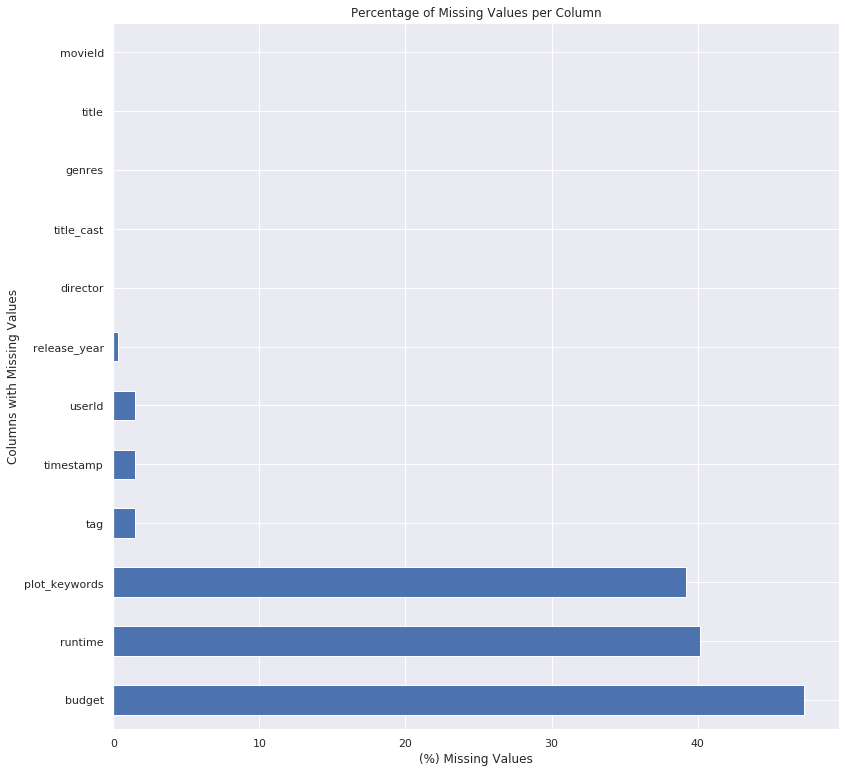

In [67]:
# The percentage of each column of missing values
total = movies_df.isnull().sum().sort_values(ascending=False)
percent_1 = movies_df.isnull().sum()/movies_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2],
                         axis=1, keys=['Total', '(%) missing'])
missing_data['(%) missing'].plot(kind='barh')
plt.xlabel('(%) Missing Values')
plt.ylabel('Columns with Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.show()

This null values data is visualized in the graph above

movieId             0.00
title               0.00
genres              0.00
title_cast_x        0.00
director_x          0.00
runtime_x          40.21
budget_x           47.33
plot_keywords_x    39.22
userId              1.55
tag                 1.55
timestamp           1.55
release_year        0.33
title_cast_y       18.50
director_y         38.90
runtime_y          40.21
budget_y           47.33
plot_keywords_y    39.22
dtype: float64


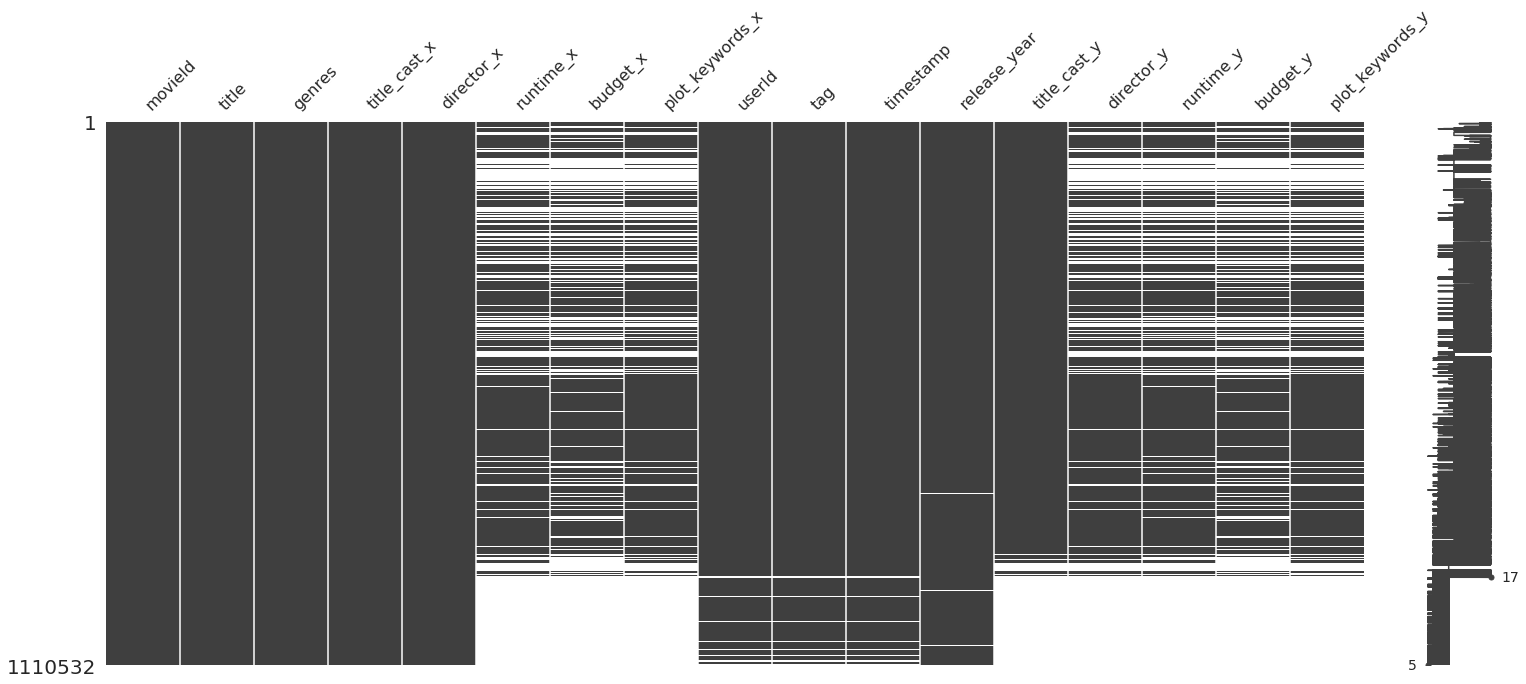

In [68]:
print(round(metadata.isna().sum()/metadata.isnull().count()*100, 2))
msno.matrix(metadata)
plt.show()

In [70]:
metadata1 = metadata.copy() 

metadata1.drop(['title_cast','director','budget','plot_keywords'],
  axis='columns',inplace=True)

metadata1['runtime'].fillna((metadata1['runtime'].mean()), inplace=True)

KeyError: "['title_cast' 'director' 'budget' 'plot_keywords'] not found in axis"

#### Data Scaling

#### Dimension Reduction

<a id="four"></a>
## 4. MODELLING
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Content-Based Filtering

In trying to achieve the ultimate user experience that keeps users coming back to use the product. The company needs to tailor the product to the user through a filtering process.A content-based recommender system strives to create the best user experience by tailoring the product to the user.This is done by using content based filtering methods,these methods utilise the desciption of the characteristics of the item such as the genre, category, tags etc.With all that theory in mind.The Content-Based Recommendation system that we built computes similarity between movies based on movie genres. It will suggest movies that are most similar to a particular movie based on its genre. The movies.csv dataset is used to build the recommender.We did not use the content-based filtering method to predict ratings as it is computational expensive.

In [96]:
movies_df.head(2)

,movieId,title,genres,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp,release_year
0,1,Toy Story,,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791.0,Owned,1.515175e+09,1995.0
1,1,Toy Story,,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048.0,imdb top 250,1.172144e+09,1995.0


In [72]:
# Break up the big genre string into a string array
movies_df['genres'] = movies_df['genres'].str.split('|')
# Convert genres to string value
movies_df['genres'] = movies_df['genres'].fillna("").astype('str')

In [95]:
movies_df['genres'].head()

0    
1    
2    
3    
4    
Name: genres, dtype: object

In [94]:
#create a sample of the movies genres  
sample_genre= movies_df['genres'].head(20000)
sample_genre.head()

0    
1    
2    
3    
4    
Name: genres, dtype: object

### Vectorizing the content 

The content-based recommender system that we are developing makes use of the descriptions of the characteristics of the movie.These description are often qualitative.To utilise this vital information we vectorized the qualitative feature.We used the  **Term Frequency (TF)** and **Inverse Document Frequency (IDF)** which is commonly used as an  information retrieval systems and also content based filtering mechanisms (such as a content based recommender). The TF-IDF vectorizer is commonly used to determine the relative importance of a document / article / news item / movie etc.

This informed our decision of using the  TfidfVectorizer function from scikit-learn to transforms text to feature vectors that can be used as input to estimator.

In [93]:
#create a vectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
genre_vec = tf.fit_transform(sample_genre)

ValueError: empty vocabulary; perhaps the documents only contain stop words

### Finding the Similarities between movies

To find the similarities between two movies we made use of the **[Cosine Similarity](https://masongallo.github.io/machine/learning,/python/2016/07/29/cosine-similarity.html)** to calculate a numeric quantity that denotes the similarity between the two movies.We made use of sklearn's linear_kernel to generate the cosine similarities.

In [88]:
cosine_sim = linear_kernel(genre_vec, genre_vec)
#cosine_sim[:4, :4]

NameError: name 'genre_vec' is not defined

Now that we have a consine similarity matrix for all the movies in the dataset.The next step was to write a function that returns the 10 most similar movies based on the consine similarity score.

In [89]:
def genre_recommendations(movie_title):
    
    """
    Returns top 10 movie recommended movies based on movie title
    
    Parameter
    ---------
    movie_title(str): a string title of a movie.
    
    Return
    ------
    recommended_movies(str): list of recommeded movies.
    
    """
    # Build a 1-dimensional array with movie titles
    movie_index=pd.Series(movies_df.index,index=movies_df['title'])
    
    #generate  similarities between the movie title and movie index based on genre
    similarities=list(enumerate(cosine_sim[movie_index[movie_title]]))
    #generate the top 10 similarities
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)[1:11]
    recommended_movies= movies_df['title'].iloc[[i[0] for i in similarities]]
    
    return recommended_movies

### Top 10 recommendations based on a movie title 

In [91]:
genre_recommendations('Toy Story (1995)')

NameError: name 'cosine_sim' is not defined

In [ ]:
genre_recommendations('Waiting to Exhale (1995)')

The recommender system gave decent recommendations for **Toy Story** (Animation, Children's, Comedy) and **Waiting to Exhale** (Comedy, Drama,Romance). 

Overall some of the pros of using content-based recommendation is :

* No need for data on other users, thus no cold-start or sparsity problems.
* Can recommend to users with unique tastes.
* Can recommend new & unpopular items.
* Can provide explanations for recommended items by listing content-features that caused an item to be recommended (in this case, movie genres)

However some of the limitations are :

* It does not recommend items outside a user's content profile
* It is unable to exploit quality judgements of other users
* Consumers might have multiple interests

## Collaborative-Based Filtering
Collaborative Filtering is the most common technique used when it comes to building intelligent recommender systems that can learn to give better recommendations as more information about users is collected.

Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users. It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data.

***Surprise:***

* Provides various ready-to-use prediction algorithms such as baseline algorithms, neighborhood methods, matrix factorization-based ( SVD, PMF, SVDpp, NMF), and many others.
* Provides tools to evaluate, analyse and compare the algorithms’ performance.

From the Suprise library, the follwoing algorithms were used:

### Basic algorithms
***NormalPredictor:*** this algorithm predicts a random rating based on the distribution of the training set, which is assumed to be normal.

***BaselineOnly:*** this algorithm predicts the baseline estimate for given user and item.

### k-NN algorithms
***KNNBasic:*** this is a basic collaborative filtering algorithm.

***KNNWithMeans:*** this is a basic collaborative filtering algorithm, taking into account the mean ratings of each user.

***KNNWithZScore:*** this is a basic collaborative filtering algorithm, taking into account the z-score normalization of each user.

***KNNBaseline:*** is a basic collaborative filtering algorithm taking into account a baseline rating.

### Matrix Factorization-based algorithms
***SVD:*** this algorithm is equivalent to Probabilistic Matrix Factorization ( which makes use of data provided by users with similar preferences to offer recommendations to a particular user).

***SVDpp:*** this algorithm is an extension of SVD that takes into account implicit ratings.

***NMF:*** this is a collaborative filtering algorithm based on Non-negative Matrix Factorization. It is very similar with SVD.

***SlopeOne:*** this is a straightforward implementation of the SlopeOne algorithm.

***Coclustering:*** is a collaborative filtering algorithm based on co-clustering.


### Using the Suprise Library

In [ ]:
#Loading 10000 dataset
data = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(10000), Reader)

In [ ]:
 #Implement an algorithm
algo = [SVD(), SVDpp(), SlopeOne(), NMF(), NormalPredictor(), KNNBaseline(), 
                  KNNBasic(), KNNWithMeans(), KNNWithZScore(), BaselineOnly(), CoClustering()]

#Read 10000 dataset
data2 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(10000), Reader())

#Implementing algorithm for RMSE
algo_rmse=[]
for a in algo:
    
    cross_valid=cross_validate(a, data2, measures=['RMSE'], cv = 3)
    output=pd.DataFrame.from_dict(cross_valid).mean(axis=0)
    output=output.append(pd.Series([str(a).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    algo_rmse.append(output)

algo_rmse
surprise_results = pd.DataFrame(algo_rmse).set_index('Algorithm').sort_values('test_rmse')
surprise_results

Based on the table above containing test_rmse, fit_time, test_time values for the algorithms, we notice that the SVDpp, SVD and BaselineOnly algorithms are top three best performing algorithms. So we use the best performing top three for prediction and to find the Root Mean Squared Error (RMSE) values.

#### Predicting with SVDpp algorithm

In [ ]:
#Loading 100000 dataset
data4 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(100000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data4, test_size=0.05)

In [ ]:
from surprise import accuracy
#SVDpp model
svdpp=SVDpp(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svdpp.fit(trainset)

# Making prediction on the validation dataset
test_pred= svdpp.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svdpp.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVDpp.csv", index=False)

#### Predicting with SVD algorithm

In [ ]:
#Loading 1000000 dataset
data3 = Dataset.load_from_df(train[['userId', 'movieId', 'rating']].head(1000000), Reader()) 

In [ ]:
trainset, testset = train_test_split(data3, test_size=0.05)

In [ ]:
from surprise import accuracy
#SVD model
svd=SVD(n_epochs = 30, n_factors = 200, init_std_dev = 0.05, random_state=42)

#Fitting the model
svd.fit(trainset)

# Making prediction on the validation dataset
test_pred= svd.test(testset)

#Evaluating model performance
rsme_collabo = accuracy.rmse(test_pred,
                             verbose=True)

In [ ]:
#Predicting the rating for each user and movie
ratings=[]
for x,y in test.itertuples(index=False):
    output=svd.predict(x,y)
    ratings.append(output)
    
output_df=pd.DataFrame(ratings)[['uid','iid','est']]
output_df['ID']=output_df['uid'].astype(str) + '_' + output_df['iid'].astype(str)
output_df=output_df[['ID','est']]
output_df.head()

In [ ]:
#Creating the "results" dataframe and convert to csv
results = pd.DataFrame({"Id":output_df['ID'],"rating": output_df['est']})
results.to_csv("SVD.csv", index=False)

### Logging Experiments on Comet

In [ ]:
# params = {"test_size": 0.3,
#           "model_type": "Bernoulli-Naive_Bayes",
#           "vectorizer": "tfidf vectorizer",
#           "param_grid": "None" ,
#           "stratify": True
#           }
# metrics = {"F1 score:": bnb_f1,
#            "Recall:": bnb_rec,
#            "Precision:": bnb_prec,
#            'Accuracy': bnb_acc
#            }
experiment_name = 'Comet Set Up'

In [ ]:
experiment.set_name(experiment_name)
# experiment.log_parameters(params)
# experiment.log_metrics(metrics)
experiment.end()

<a id="five"></a>
## 5. MODEL PERFORMANCE COMPARISON
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
## 6. MODEL EXPLANATIONS
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="seven"></a>
## 7. CONCLUSION
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Machine Learning is a technique of training machines to perform the activities a human brain can do, albeit bit faster and better than an average human-being. 

Dealing with a large dataset has afforded us the opportuninty to gather insights that could be used to better understand our User's behaviour and allowed us to dig deeper in understanding how different features can be used to maximise consumer exprience, with the aid of algorithms such as Kmeans and Hierarchical clustering we were able to segregate groups with similar traits and assign them into clusters.

***Content_based_filtering***
We were able to use a mathematical approach that capitalizes on the simalarity features of a user based on their historical preference to make recommendation of movies that they are most likely to be interested in watching and this can be used to drive traffic as well as monitor traffic of the app.

***Colaborative Filtering***
After carefully training and cross-validating a number of algorithms using features that our users interaction with the features such as ratings we obsevered that SVD wich uses the probability that a user is mostly to take interest a certain product/services if they have interacted with that product/service such as rating a simalar product previously, we noticed that SVD did a better job at assigning probalities of recommend an accurate movie to a certain user using the users rating information.

<a id="eight"></a>
## 8. APPENDIX
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>